In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#Exploring the data from Times higher education
data  = pd.read_csv("realdonaldtrump.csv")
print("The dimension of the table is ", data.shape)
data.head()
data.describe()
data.info()

The dimension of the table is  (42295, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42295 entries, 0 to 42294
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         42295 non-null  int64 
 1   link       42295 non-null  object
 2   content    42295 non-null  object
 3   date       42295 non-null  object
 4   retweets   42295 non-null  int64 
 5   favorites  42295 non-null  int64 
 6   mentions   20104 non-null  object
 7   hashtags   5499 non-null   object
dtypes: int64(3), object(5)
memory usage: 2.6+ MB


In [53]:
data['year'] = data['date'].apply(lambda buf: int(buf[:4])) #To convert into year
data['date'] = pd.to_datetime(data['date']) # So pandas understands it's a date
number_of_days = (data["date"].max() - data["date"].min()).days
print("Amount of tweets: {}".format(len(data)))
print("Published in {} days, which makes {:.2f} tweets per day".format(number_of_days, len(data)/number_of_days))

Amount of tweets: 42295
Published in 3999 days, which makes 10.58 tweets per day


In [54]:
#Dropping values
missing_data = data.dropna(inplace=True)
missing_data
#checking if the data has been cleaned
total_null = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
year,0,0.0
hashtags,0,0.0
mentions,0,0.0
favorites,0,0.0
retweets,0,0.0
date,0,0.0
content,0,0.0
link,0,0.0
id,0,0.0


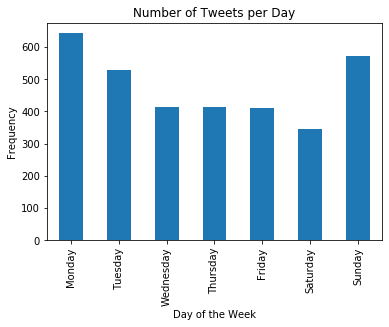

In [63]:
#Frequency of Tweets based on day of week
plt.title("Number of Tweets per Day")
tweet_cpt = data["date"].groupby(data["date"].dt.day_name()).count()
tweet_cpt.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.show()

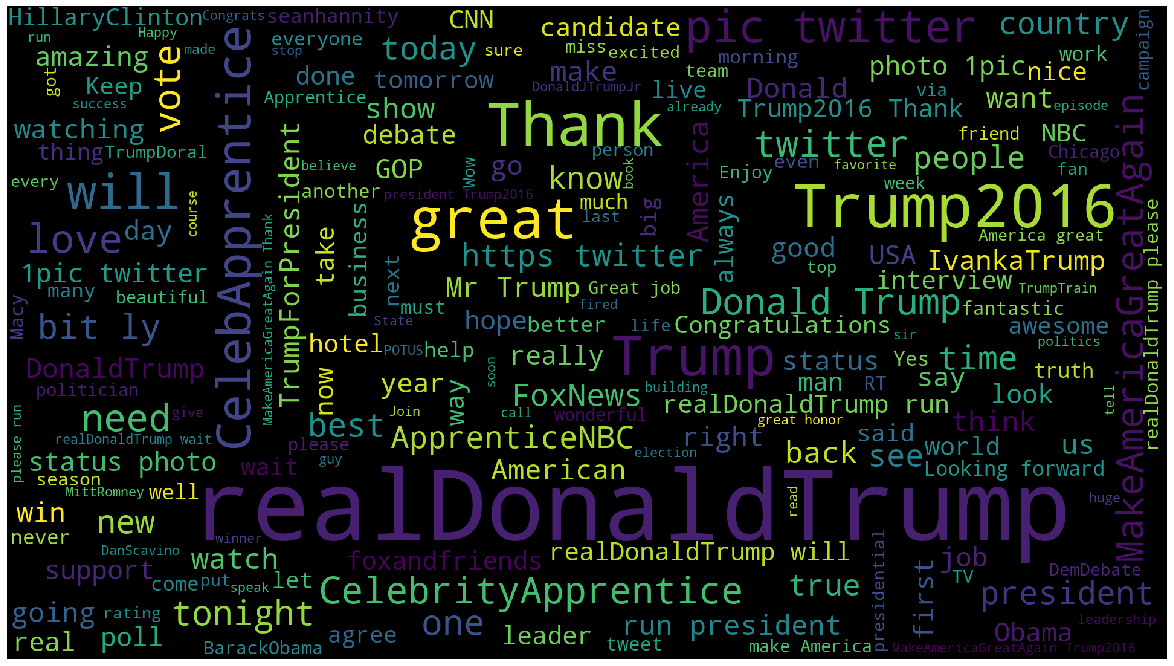

In [66]:
#WordCloud to represent most common words/Phrases used 
tweetText = data.content.tolist()
unique_string = (" ").join(words)
wordcloud = WordCloud(width = 1920, height = 1080).generate(unique_string)
plt.figure(figsize=(24,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

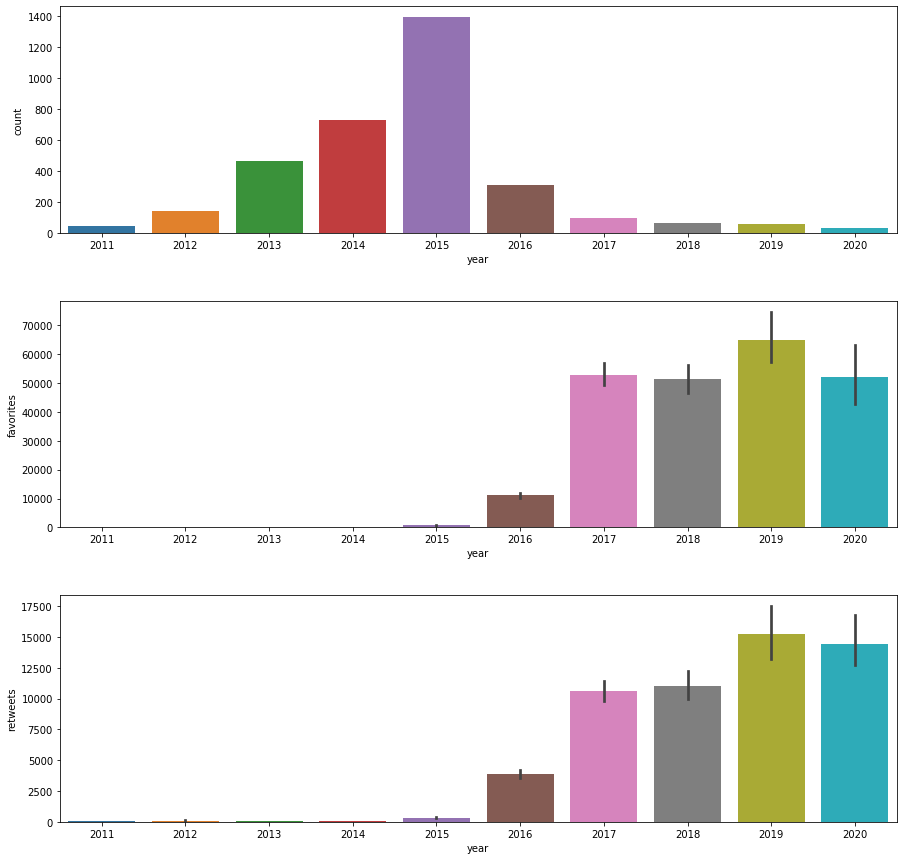

In [56]:
#statistics of tweets over the years
fig, ax = plt.subplots(3,1,figsize=(15,15))
plt.subplots_adjust(hspace=0.3)
sns.countplot(x='year', data=data, ax=ax[0])
sns.barplot(x='year', y='favorites', data=data, ax=ax[1])
sns.barplot(x='year', y='retweets', data=data, ax=ax[2]);